In [6]:
import pandas as pd
df1=pd.read_csv("lab flu confirmed 2008-2013.csv")
df2 =pd.read_csv("lab flu confirmed 2014 - 2019.csv")

df1= df1.iloc[:, 0:6]
df1.head()

,Week Ending (Friday),State,Age group,Sex,Indigenous status,Type/Subtype
0,03/01/2014,NSW,35-39,Female,not available,A(H3N2)
1,03/01/2014,NSW,80-84,Female,not available,A(unsubtyped)
2,03/01/2014,NSW,80-84,Male,not available,A(unsubtyped)
3,03/01/2014,NSW,85+,Female,not available,A(H3N2)
4,03/01/2014,NT,00-04,Male,non-Indigenous,B


In [7]:
df2= df2.iloc[:, 0:6]
df2.head()

,Week Ending (Friday),State,Age group,Sex,Indigenous status,Type/Subtype
0,03/01/2020,NSW,00-04,Female,not available,A(H1N1)pdm09
1,03/01/2020,NSW,00-04,Female,not available,A(unsubtyped)
2,03/01/2020,NSW,00-04,Female,not available,A(unsubtyped)
3,03/01/2020,NSW,00-04,Male,not available,A(unsubtyped)
4,03/01/2020,NSW,00-04,Male,not available,A(unsubtyped)


In [10]:
#put the two df's together
df = pd.concat([df2, df1], axis=0)
df.head()
print(len(df))

1049869
1049869


In [11]:
# create labels
flu_types= df['Type/Subtype'].unique()
print(flu_types)

['A(H1N1)pdm09' 'A(unsubtyped)' 'B' 'A(H3N2)' 'A and B' 'Untyped' 'C'
 'A(H1N1)']


In [14]:
risk = ['pandemic_H1', 'pandemic_unknown', 'seasonal', 'pandemic_H3', 'seasonal_mixed', 'unknown', 'low_risk', 'pre-pandemic']

In [15]:
#create dictionary
risk_dict= dict(zip(flu_types, risk))
print(risk_dict)

{'A(H1N1)pdm09': 'pandemic_H1', 'A(unsubtyped)': 'pandemic_unknown', 'B': 'seasonal', 'A(H3N2)': 'pandemic_H3', 'A and B': 'seasonal_mixed', 'Untyped': 'unknown', 'C': 'low_risk', 'A(H1N1)': 'pre-pandemic'}


In [23]:
#replace class column with classification
df['Class'] = df['Type/Subtype']
df.head()
flu=df.replace({"Class": risk_dict})
flu.head()

,Week Ending (Friday),State,Age group,Sex,Indigenous status,Type/Subtype,Class
0,03/01/2020,NSW,00-04,Female,not available,A(H1N1)pdm09,pandemic_H1
1,03/01/2020,NSW,00-04,Female,not available,A(unsubtyped),pandemic_unknown
2,03/01/2020,NSW,00-04,Female,not available,A(unsubtyped),pandemic_unknown
3,03/01/2020,NSW,00-04,Male,not available,A(unsubtyped),pandemic_unknown
4,03/01/2020,NSW,00-04,Male,not available,A(unsubtyped),pandemic_unknown


In [24]:
flu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1049869 entries, 0 to 178631
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Week Ending (Friday)  1049869 non-null  object
 1   State                 1049869 non-null  object
 2   Age  group            1049869 non-null  object
 3   Sex                   1049869 non-null  object
 4   Indigenous status     1049869 non-null  object
 5   Type/Subtype          1049869 non-null  object
 6   Class                 1049869 non-null  object
dtypes: object(7)
memory usage: 64.1+ MB


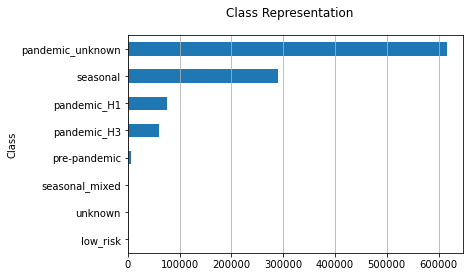

In [68]:
# Label frequency
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.suptitle("Class Representation", fontsize=12)
flu["Class"].reset_index().groupby("Class").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

# Pre-processing for Text Classification

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize and fit CountVectorizer with given text documents
vectorizer = CountVectorizer(analyzer='char').fit(flu['Type/Subtype'])

# use the vectorizer to transform the document into word count vectors (Sparse)
word_mat = vectorizer.transform(flu['Type/Subtype'])

In [36]:
from sklearn.preprocessing import LabelEncoder

# creating mapping from unique label texts to unique integers
#encoder = LabelEncoder().fit(flu['Class'])
# creating instance of labelencoder
labelencoder = LabelEncoder()
# using the encoder to encode the entire dataset
#y = encoder.transform(encoder)
y = labelencoder.fit_transform(flu['Class'])

## Split Data

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(word_mat, y, test_size=0.3)

# Modeling
### Training

In [38]:
# Model Training
from sklearn.naive_bayes import MultinomialNB

# instantiate the model as clf(classifier) and train it
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB()

## Prediction / Evaluation

In [54]:
#make class predictions
pred = clf.predict(x_test)
#transform labels back to text
preds = labelencoder.inverse_transform(pred)
preds

array(['pandemic_unknown', 'pandemic_unknown', 'pandemic_unknown', ...,
       'pandemic_unknown', 'pandemic_unknown', 'pandemic_unknown'],
      dtype=object)

In [48]:
#Transform test target back to text
yt= labelencoder.inverse_transform(y_test)
yt

array(['pandemic_unknown', 'pandemic_unknown', 'pandemic_unknown', ...,
       'pandemic_unknown', 'pandemic_unknown', 'pandemic_unknown'],
      dtype=object)

In [55]:
# confusiong matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yt, preds)

In [57]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['pandemic_H1', 'pandemic_unknown', 'seasonal', 'pandemic_H3', 'seasonal_mixed', 'unknown', 'low_risk', 'pre-pandemic'], 
                     columns = ['pandemic_H1', 'pandemic_unknown', 'seasonal', 'pandemic_H3', 'seasonal_mixed', 'unknown', 'low_risk', 'pre-pandemic'])

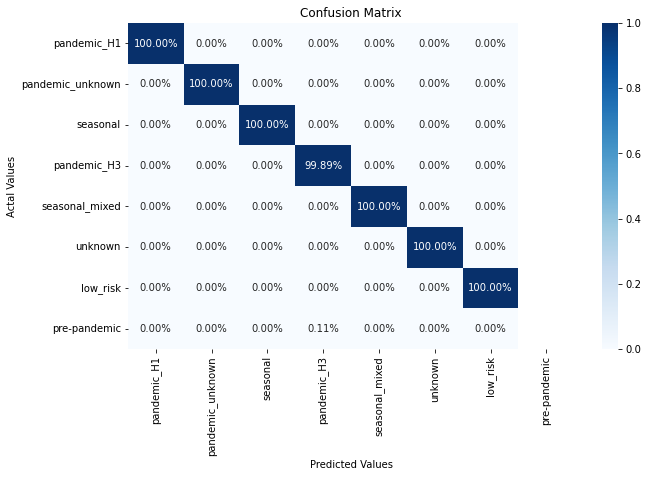

In [67]:
import seaborn as sns
import numpy as np
#Plotting the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm_df/np.sum(cm_df), annot=True, cmap='Blues', fmt='.2%')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Resources/ References
* Data: [Australian Government](https://www1.health.gov.au/internet/main/publishing.nsf/Content/ohp-pub-datasets.htm)